# Investigation of how the changing group membership affects the intial outbreak of the epidemic

I wanna see how much it affects the initial outbreak rate

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import animation

from networkx.generators.community import stochastic_block_model
from SellkeSimulation.DynamicNetworks import dynamic_stochastic_block_model
from SellkeSimulation.Simulation import complex_epidemic_simulation

C:\Users\mfyles\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


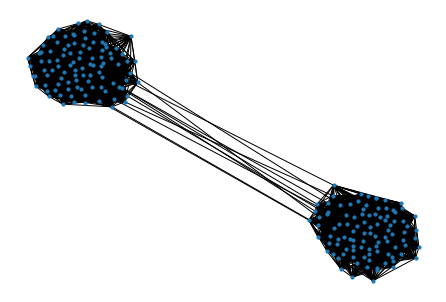

In [3]:
block_sizes = [100,100]
probs = [[0.4,0.001],[0.001,0.4]]
migration = [[1,0],[0,1]]

my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                               p = probs,
                                               m = migration,
                                               waiting_time_par = 5,
                                               end_time = 100)
nx.draw(my_dynamic_sbm.G, node_size = 10)

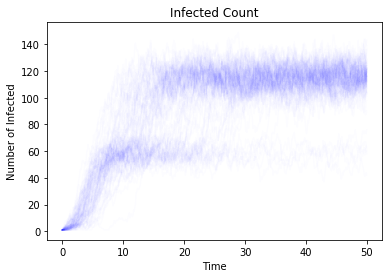

In [7]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")
i = 0

repeats = 100
while i < repeats:
    my_sbm = stochastic_block_model(sizes = block_sizes,
                                               p = probs)
    
    my_network_epidemic = complex_epidemic_simulation(my_sbm,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True)
    
    my_network_epidemic.iterate_epidemic()

    infected = my_network_epidemic.data_infected_counts
    time = my_network_epidemic.data_time
    
    if my_network_epidemic.iteration == 500:
        plt.plot(time, infected, alpha = 0.01, color = 'b')
        i += 1
        
        sys.stdout.flush()
        print('Percentage Complete:', round(i/repeats*100), '%' , end='\r')
plt.savefig("static_network_epidemic.png")

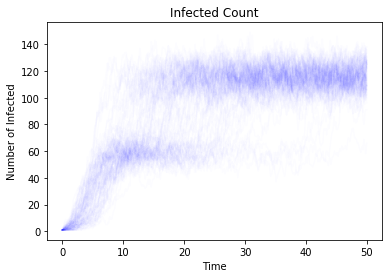

In [6]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")

i = 0
repeats = 100
while i < repeats:
    my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                                   p = probs,
                                                   m = migration,
                                                   waiting_time_par = 5, #Nodes remain in the same community for an exponential(5) amount of time
                                                   end_time = 50)       #The network will pre-generate data up until time = 50
    
    my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True,
                                                  increment_network = my_dynamic_sbm.increment_network)
    
    my_network_epidemic.iterate_epidemic()

    infected = my_network_epidemic.data_infected_counts
    time = my_network_epidemic.data_time
    sys.stdout.flush()
    #print(my_network_epidemic.iteration, end='\r')
    if my_network_epidemic.iteration == 500:
        plt.plot(time, infected, alpha = 0.01, color = 'b')
        i += 1
        
        print('Percentage Complete:', round(i/repeats*100), '%' , end='\r')
plt.savefig("5_swap_rate.png")

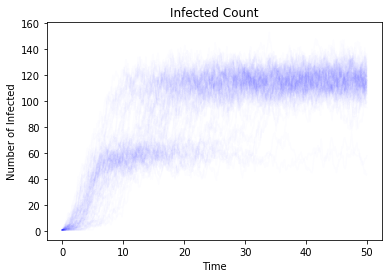

In [8]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")

i = 0
repeats = 100
while i < repeats:
    my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                                   p = probs,
                                                   m = migration,
                                                   waiting_time_par = 1, #Nodes remain in the same community for an exponential(5) amount of time
                                                   end_time = 50)       #The network will pre-generate data up until time = 50
    
    my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True,
                                                  increment_network = my_dynamic_sbm.increment_network)
    
    my_network_epidemic.iterate_epidemic()

    infected = my_network_epidemic.data_infected_counts
    time = my_network_epidemic.data_time
    sys.stdout.flush()
    #print(my_network_epidemic.iteration, end='\r')
    if my_network_epidemic.iteration == 500:
        plt.plot(time, infected, alpha = 0.01, color = 'b')
        i += 1
        
        print('Percentage Complete:', round(i/repeats*100), '%' , end='\r')
plt.savefig("1_swap_rate.png")

In [31]:
number_of_steps = 15
repeats = 10
results = np.zeros(shape = (number_of_steps,repeats,501))
parameters = []
for increment in range(number_of_steps):
    i = 0
    parameters.append(increment + 1)
    while i < repeats:
        
        my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                                   p = probs,
                                                   m = migration,
                                                   waiting_time_par = 0.1 + 0.5*increment,
                                                   end_time = 50)       #The network will pre-generate data up until time = 50
        
        my_network_epidemic = complex_epidemic_simulation(my_sbm,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True)
    
        my_network_epidemic.iterate_epidemic()
        
        time = my_network_epidemic.data_time
    
        if my_network_epidemic.iteration == 500:
            results[increment, i, :] = results[increment, i, :] + my_network_epidemic.data_infected_counts
            i += 1
            sys.stdout.flush()
            print('Round: ', increment, '    Percentage Complete: ', round(i/repeats*100), '%' , end='\r')
            


[None, None, None, None, None, None, None, None, None, None]

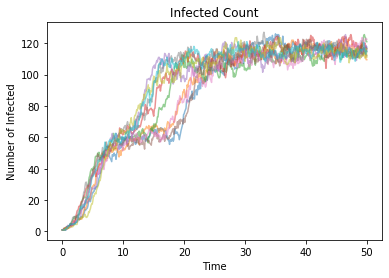

In [41]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")

medians = np.zeros((number_of_steps, 501))

for model in range(number_of_steps):
    for iteration in range(501):
        medians[model, iteration] = medians[model, iteration] + np.median(results[model, :, iteration])

for i in range(number_of_steps):
    plt.plot(time, medians[i,:], alpha = 0.5)

line_names = []
[line_names.append(f"parameter = {par}") for par in parameters]

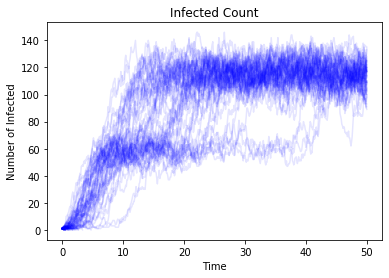

In [42]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")

i = 0
repeats = 100
while i < repeats:
    
    
    my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                                   p = probs,
                                                   m = migration,
                                                   waiting_time_par = 0.1,
                                                   end_time = 50)       #The network will pre-generate data up until time = 50
        
    my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True)
    
    my_network_epidemic.iterate_epidemic()

    infected = my_network_epidemic.data_infected_counts
    time = my_network_epidemic.data_time
    sys.stdout.flush()
    #print(my_network_epidemic.iteration, end='\r')
    
    plt.plot(time, infected, alpha = 0.1, color = 'b')
    i += 1
        
    print('Percentage Complete:', round(i/repeats*100), '%' , end='\r')


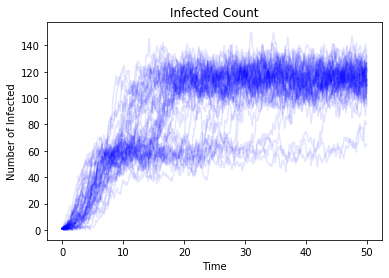

In [40]:
plt.title("Infected Count")
plt.xlabel("Time")
plt.ylabel("Number of Infected")

i = 0
repeats = 100
while i < repeats:
    
    
    my_dynamic_sbm = dynamic_stochastic_block_model(sizes = block_sizes,
                                                   p = probs,
                                                   m = migration,
                                                   waiting_time_par = 10,
                                                   end_time = 50)       #The network will pre-generate data up until time = 50
        
    my_network_epidemic = complex_epidemic_simulation(my_dynamic_sbm.G,
                                                  beta = 0.04,
                                                  infection_period_parameters = 1.5,
                                                  initial_infected = 1,
                                                  time_increment = 0.1,
                                                  max_iterations = 500,
                                                  SIS = True,
                                                  increment_network = my_dynamic_sbm.increment_network)
    
    my_network_epidemic.iterate_epidemic()

    infected = my_network_epidemic.data_infected_counts
    time = my_network_epidemic.data_time
    sys.stdout.flush()
    #print(my_network_epidemic.iteration, end='\r')
    
    plt.plot(time, infected, alpha = 0.1, color = 'b')
    i += 1
        
    print('Percentage Complete:', round(i/repeats*100), '%' , end='\r')
